# Automatic recognition of optimal grid / mesh parameters
This code can automaticall recognise the loop and will optimise the size of a mesh / grid scan over the loop.

## Load test data image
Here we load just one image taken at zero degrees rotation:

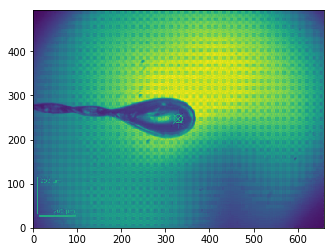

In [1]:
%matplotlib inline

import os
import sys
auto_mesh_dir = os.path.dirname(os.getcwd())
if not auto_mesh_dir in sys.path:
    sys.path.append(auto_mesh_dir)
import autoMesh

# Temporary working directory
import tempfile
working_dir = tempfile.mkdtemp(prefix="autoMesh_")
        
test_data_directory = os.path.join(auto_mesh_dir, "tests", "data")
snapshot_dir = os.path.join(test_data_directory, "snapshots_20141128-084026")
image_path = os.path.join(snapshot_dir, "snapshot_000.png")
image000 = autoMesh.readImage(image_path)
autoMesh.plotImage(image000)

We need a background image as well:

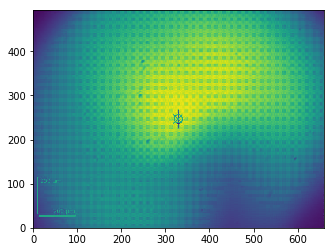

In [2]:
background_path = os.path.join(test_data_directory, "snapshots_20141128-084026", "snapshot_background.png")
image_background = autoMesh.readImage(background_path)
autoMesh.plotImage(image_background)

First the backrgound is subtraced from the loop image:

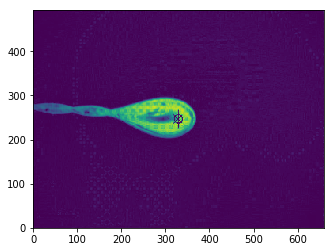

In [3]:
difference_image = autoMesh.subtractBackground(image000, image_background)
autoMesh.plotImage(difference_image)

Then the image is filtered by applying a threshold, twice eroding the image and then twice dilating the image:

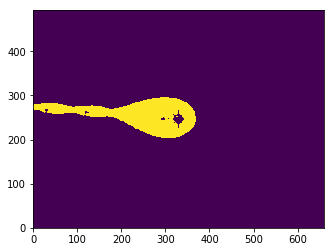

In [4]:
filtered_image = autoMesh.filterDifferenceImage(difference_image)
autoMesh.plotImage(filtered_image)

The contour of the loop is then calculated as two lists:

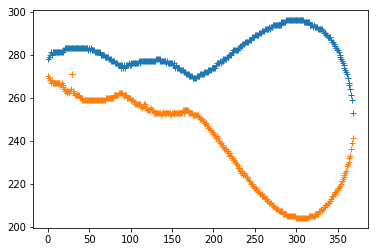

In [5]:
(list_index, list_upper, list_lower) = autoMesh.loopExam(filtered_image)
autoMesh.plotLoopExam(filtered_image, list_index, list_lower, list_upper)

# Determining the mesh size from 12 snapshot images

In [6]:
(new_phi, x1_pixels, y1_pixels, dx_pixels, dy_pixels, delta_phiz_pixels, std_phiz_pixels, image_path, are_the_same_image) = \
                autoMesh.autoMesh(snapshot_dir, working_dir, working_dir,
                        debug=False,
                        loop_max_width=0.8 * 420,
                        loop_min_width=0.35 * 420,
                        find_largest_mesh=False)
print(new_phi, x1_pixels, y1_pixels, dx_pixels, dy_pixels, delta_phiz_pixels, std_phiz_pixels, image_path, are_the_same_image)

INFO:root:Analysing snapshot image at omega = 0 degrees
INFO:root:Analysing snapshot image at omega = 30 degrees
INFO:root:Analysing snapshot image at omega = 60 degrees
INFO:root:Analysing snapshot image at omega = 90 degrees
INFO:root:Analysing snapshot image at omega = 120 degrees
INFO:root:Analysing snapshot image at omega = 150 degrees
INFO:root:Analysing snapshot image at omega = 180 degrees
INFO:root:Analysing snapshot image at omega = 210 degrees
INFO:root:Analysing snapshot image at omega = 240 degrees
INFO:root:Analysing snapshot image at omega = 270 degrees
INFO:root:Analysing snapshot image at omega = 300 degrees
INFO:root:Analysing snapshot image at omega = 330 degrees


32 368
60 -274.5 -15.5 313 38 -4.86503267974 1.24345346676 /mntdirect/_scisoft/users/svensson/git/AutoMesh/tests/data/snapshots_20141128-084026/snapshot_060.png False


Auto grid_info: {'x1': -0.70357142857142863, 'dx_mm': 0.84523809523809534, 'y1': -0.053571428571428568, 'dy_mm': 0.090476190476190474, 'steps_x': 12, 'steps_y': 1}


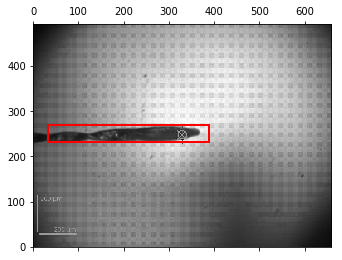

'/tmp/autoMesh_rz_tn1et/snapshot_automesh.png'

In [7]:
PIXELS_PER_MM = 420.0
delta_phiz_pixels = 0.0
x_offset_left = 0.05
x_offset_right = 0.05
beam_size = 0.1
over_sampling_x = 1.5
over_sampling_y = 1.5
x1 = x1_pixels / PIXELS_PER_MM - x_offset_left
y1 = -(y1_pixels + dy_pixels + delta_phiz_pixels) / PIXELS_PER_MM
dx_mm = dx_pixels / PIXELS_PER_MM + x_offset_left + x_offset_right
dy_mm = dy_pixels / PIXELS_PER_MM
steps_x = int((dx_pixels / PIXELS_PER_MM + x_offset_left + x_offset_right) / beam_size * over_sampling_x)
steps_y = int(dy_pixels / PIXELS_PER_MM / beam_size * over_sampling_y)
grid_info = {"x1": x1,
             "y1": y1,
             "dx_mm": dx_mm,
             "dy_mm": dy_mm,
             "steps_x": steps_x,
             "steps_y": steps_y}
print("Auto grid_info: %r" % grid_info)
result_image_path = os.path.join(working_dir, "snapshot_automesh.png")
autoMesh.plotMesh(image_path, grid_info, PIXELS_PER_MM, working_dir)
